<center>
 <font size="5"> <b>This notebook illustrates how to perform linear regression in R </b></font>
</center>

We consider a simple linear regression with one explanatory (regressor) variables $x$ (straight line fit). The response variables are called $y$. The statistical model is:

$$y(x; a, b, \varepsilon) = a x + b + \varepsilon$$

where $\varepsilon$ is the error. We assume that the error follows a normal distribution with mean $0$ and standard deviation $\sigma$:

$$\varepsilon \sim {\cal N}(0, \sigma)$$

The parameters to estimate are the slope $a$ and the intercept $b$. The estimators will be denoted as $\hat{a}$ and $\hat{b}$. The estimation is done by minimizing the sum of squared residuals 

$$\sum_{i=1} \left(y_i - y(x_i; a, b, \varepsilon=0)\right)^2$$

where $y_i$ is the $i^{th}$ measured values of $y$. We also assume that the errors of all measurements are independent. 

The purpose is to see how R can be used to solve this problem, that is find $\hat{a}$ and $\hat{b}$ as well as their covariance matrix. For this, three methods can be used. We will perform calculations for all of them and compare results. Hopefully, we'll find the same results !

In all cases, we consider that the explanatory variable $x$ can take four values ($1$, $2$, $3$ and $4$) and that $\sigma=0.1$. We generate a dataset for $a=2$ and $b=0.4$. 

x,y
1,2.498620
2,4.497180
3,6.543421
4,8.423772


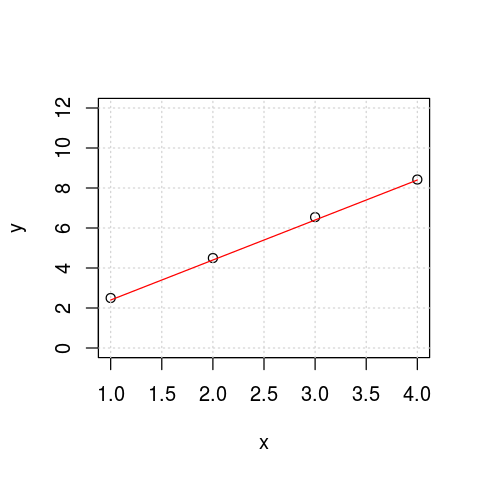

In [10]:
# We set the seed to a constant value so that results are reproducible
set.seed(1485)

x <- c(1,2,3,4)
slopet <- 2
interceptt <- 0.4

# Generate pseudo-data
sigma <- 0.1
y <- slopet*x + interceptt + rnorm(length(x), 0, sigma)

# Making data frame
ds <- data.frame(x = x, y = y)
ds

# Plot data
options(repr.plot.width=4, repr.plot.height=4) # This sets the size of the plot
plot(y~x, ylim=c(0, 12))
grid()

# Plot true line
lines(x, slopet*x + interceptt, col="red")



#### Method 1: analytical (explicit calculation)

We know (see lecture notes) that the estimators are given by 

$$\hat{a} = \frac{n\sum_i x_i y_i - \sum_i\sum_j x_i y_j}{n\sum_i x_i^2 - \sum_i\sum_j x_i x_j}$$

and 

$$\hat{b} = \frac{\sum_i\sum_j x_i^2y_j - \sum_i\sum_j x_i y_i x_j}{n\sum_i x_i^2 - \sum_i\sum_j x_i x_j}$$

and that the covariance matrix is given by

$$U=\begin{pmatrix} \sigma_a^2 & cov(a, b)\\cov(a, b) & \sigma_b^2\end{pmatrix} = \frac{\sigma^2}{n\sum_i x_i^2 - \left(\sum_i x_i\right)^2}\begin{pmatrix} n & -\sum_i x_i\\-\sum_i x_i & \sum_i x_i^2\end{pmatrix}$$

'data.frame':	4 obs. of  2 variables:
 $ x: num  1 2 3 4
 $ y: num  2.5 4.5 6.54 8.42


(Intercept)           x 
  0.5353247   1.9821694

[1] "Printing model summary"



Call:
lm(formula = y ~ x, data = ds)

Residuals:
        1         2         3         4 
-0.018874 -0.002483  0.061588 -0.040231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53532    0.06581   8.135 0.014777 *  
x            1.98217    0.02403  82.491 0.000147 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05373 on 2 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9996 
F-statistic:  6805 on 1 and 2 DF,  p-value: 0.0001469


[1] "Printing model coeff (post-fit)"


(Intercept)           x 
  0.5353247   1.9821694

[1] "Printing fit rsquared"


[1] 0.9997062

[1] "Printing vcov"


,(Intercept),x
(Intercept),0.004330439,-0.0014434795
x,-0.001443480,0.0005773918


[1] "Printing analytical explicit calculations"


[1] "Analytical results: varslope=0.00057739 varintercept=0.00433044 covariance=-0.00144348"

[1] "Printing analytical matrix calculations"


,0.5353247
x,1.9821694


,,x
,0.004330439,-0.0014434795
x,-0.001443480,0.0005773918


[1] "Plotting"


ERROR: Error in summary(prd): object 'prd' not found


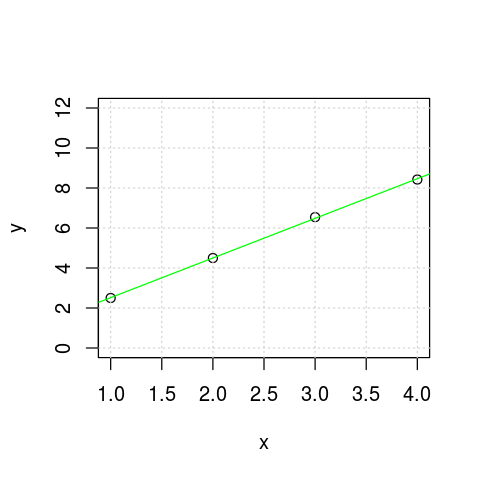

In [3]:
set.seed(1485)
options(repr.plot.width=4, repr.plot.height=4)
x <- c(1,2,3,4)
slopet <- 2
interceptt <- 0.4

# Generate pseudo-data
sigma <- 0.1
y <- slopet*x + interceptt + rnorm(length(x), 0, sigma)

# Making data frame
ds <- data.frame(x = x, y = y)
str(ds)

# Plot data
plot(y~x, ylim=c(0, 12))
grid()

# Make linear regression
ds.lm <- lm(y~x, data=ds)
coeffs = coefficients(ds.lm)
coeffs

print("Printing model summary")
summary(ds.lm)

print("Printing model coeff (post-fit)")
ds.lm$coef

print("Printing fit rsquared")
summary(ds.lm)$r.squared

print("Printing vcov")
vcov(ds.lm)


print("Printing analytical explicit calculations")
# Analytical covariance matrix (see my statistics exercices)
sigmahatsq <- 1/(length(x)-2)*sum((y - (coeffs[2]*x + coeffs[1]))^2)
factor <- sigmahatsq/(length(x)*sum(x^2) - (sum(x)*sum(x)))
varslope <- length(x)*factor
varintercept <- sum(x^2)*factor
covsllint <- -1*sum(x)*factor
sprintf("Analytical results: varslope=%.8f varintercept=%.8f covariance=%.8f", varslope, varintercept, covsllint)

print("Printing analytical matrix calculations")
# Analytical from matrices
X <- cbind(1, x)
betaHat <- solve(t(X) %*% X) %*% t(X) %*% y
#var_betaHat <- anova(mod)[[3]][2] * solve(t(X) %*% X)
covMatrix <- sigmahatsq * solve(t(X) %*% X)

betaHat
covMatrix


print("Plotting")
# Plot fit
# method 1
#yt <- coeffs[2]*x+coeffs[1]
#lines(x, yt, col="red")
# method 2
abline(ds.lm, col="green")

newx <- c(3)
prd1<-predict(ds.lm, newdata = data.frame(x=newx))
summary(prd)

prd2<-predict(ds.lm,interval = c("confidence"), level = 0.90,type="response")
prd2
lines(x,prd2[,2],col="red",lty=2)
lines(x,prd2[,3],col="red",lty=2)


# Analytical (in order to check that numerical computation finds analytical solution)
n <- length(x)
covariance <- cov(x, y)*n/(n-1)
sdx <- sd(x)*sqrt(n/(n-1))
sdy <- sd(y)*sqrt(n/(n-1))
corr <- covariance/(sdx*sdy)
slopeana <- corr*sdy/sdx
interceptana <- mean(y) - corr*sdy/sdx*mean(x)
slopeana
interceptana

# Use R's plot function of model
#par(mfrow = c(2,2))
#options(repr.plot.width=10, repr.plot.height=6)
#plot(ds.lm)


#### Method 2: analytical (calculations with matrices)

Before doing so, it's is useful to perform the calculations by hand

Let's call $\theta=\begin{pmatrix}a\\b\end{pmatrix}$ the parameter vector and $X$ the regressors matrix:

$$X = \begin{pmatrix}x_1 & 1\\\vdots & \vdots\\x_n & 1\end{pmatrix}$$

The estimators are given by

$$\hat{\theta} = \left(X^T X\right)^{-1}X^Ty$$

where $X^T$ is the transpose of $X$. The correlation matrix of the $\theta$s is:

$$U=\begin{pmatrix} \sigma_a^2 & cov(a, b)\\cov(a, b) & \sigma_b^2\end{pmatrix}=\left(A^T V^{-1} A\right)^{-1}$$

where $V$ is the covariance matrix of the $y$s. As the errors are independent and normally distributed with variance $\sigma^2$, we have

$$V=\begin{pmatrix} \sigma^2 & \cdots & 0 \\ \vdots & & \vdots \\ 0 & \cdots & \sigma^2\end{pmatrix}$$

#### Method 3: lm function of R 
